In [1]:
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import joblib
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Data Preprocessing and Loading for Image Classification

def data_preprocessing(data_dir):

    # Batch size for loading images
    batch_size = 32

    # Configure the data generator to load and automatically split the data
    datagen = ImageDataGenerator(
        rescale=1.0/255.0,  # Normalize pixel values
        validation_split=0.2,  # Percentage of data for validation
    )

    # Create data generators
    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training', # training subset 80%
        shuffle=True
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation', # validation subset 20%
        shuffle=False
    )

    # Get all training and testing data batches
    X_train_batches, y_train_batches = [], []
    X_test_batches, y_test_batches = [], []

    for i in range(len(train_generator)):
        X_train_batch, y_train_batch = next(train_generator)
        X_train_batches.append(X_train_batch)
        y_train_batches.append(y_train_batch)

    for i in range(len(validation_generator)):
        X_test_batch, y_test_batch = next(validation_generator)
        X_test_batches.append(X_test_batch)
        y_test_batches.append(y_test_batch)

    # Concatenate the batches into 4D arrays
    X_train = np.concatenate(X_train_batches)
    y_train = np.concatenate(y_train_batches)
    X_test = np.concatenate(X_test_batches)
    y_test = np.concatenate(y_test_batches)

    # Flatten the images to make them 2D
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Convert one-hot labels to single labels
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)

In [ ]:
data_preprocessing("../archive"):

In [3]:
# Define a function to display the confusion matrix

def plot_cm_norm(cm, train_generator, title):
    cm_rf_normalized = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100).astype(int)

    # Get the class names
    class_names = list(train_generator.class_indices.keys())

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_rf_normalized, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title + ' Normalized Confusion Matrix (%)')
    plt.show()

Confusion Matrix:


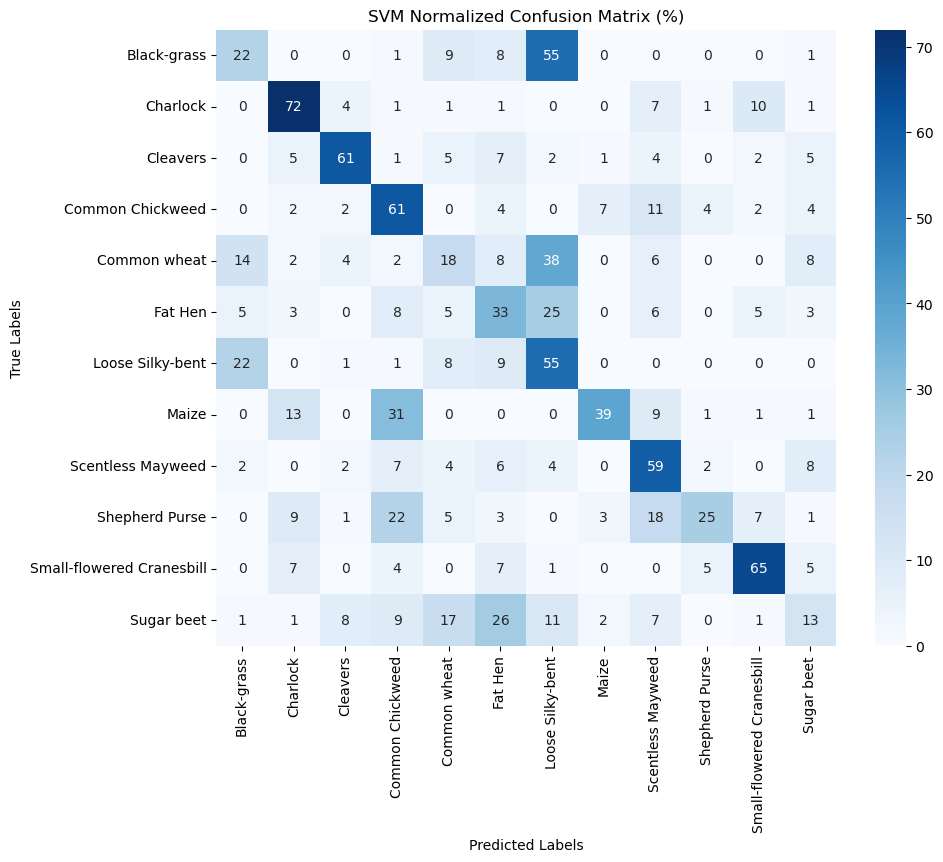


Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.23      0.22        61
           1       0.65      0.72      0.68        90
           2       0.63      0.61      0.62        67
           3       0.56      0.61      0.59       142
           4       0.14      0.18      0.16        50
           5       0.31      0.34      0.32       107
           6       0.45      0.55      0.50       152
           7       0.57      0.39      0.47        51
           8       0.55      0.60      0.57       121
           9       0.42      0.26      0.32        54
          10       0.74      0.65      0.69       115
          11       0.24      0.13      0.17        92

    accuracy                           0.48      1102
   macro avg       0.46      0.44      0.44      1102
weighted avg       0.48      0.48      0.47      1102

Accuracy: 48.00%


In [20]:
# Create an SVM classifier with a linear kernel
clf_svm = svm.SVC(kernel='linear', C=1)

# Train the SVM classifier with the training data
clf_svm.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred_svm = clf_svm.predict(X_test_flat)

# Evaluate the classifier's performance
print("Confusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_cm_norm(cm_svm, train_generator, "SVM")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# measure accuracy
accuracy = np.mean(y_pred_svm == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Save the trained SVM classifier to a file. load like: loaded_svm = joblib.load('svm_classifier.pkl')
joblib.dump(clf_svm, 'svm_classifier.pkl')

Confusion Matrix:


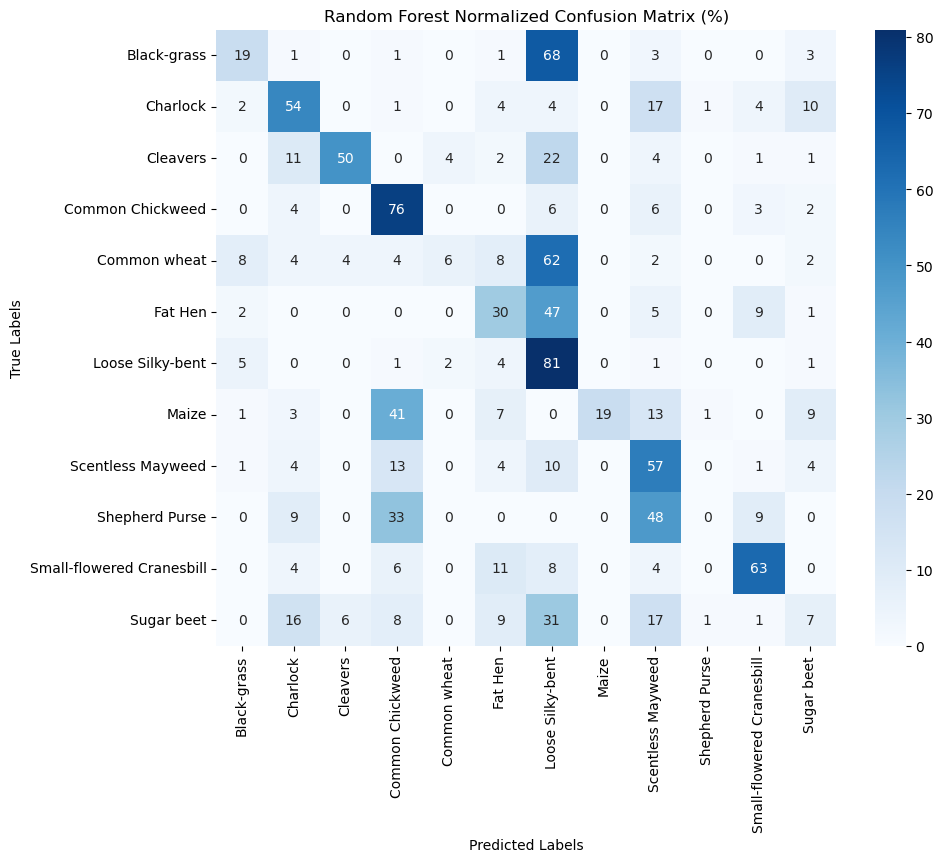


Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.20      0.26        61
           1       0.49      0.54      0.51        90
           2       0.76      0.51      0.61        67
           3       0.59      0.77      0.67       142
           4       0.30      0.06      0.10        50
           5       0.40      0.31      0.35       107
           6       0.38      0.82      0.52       152
           7       0.91      0.20      0.32        51
           8       0.42      0.57      0.49       121
           9       0.00      0.00      0.00        54
          10       0.72      0.63      0.67       115
          11       0.18      0.08      0.11        92

    accuracy                           0.47      1102
   macro avg       0.46      0.39      0.38      1102
weighted avg       0.47      0.47      0.44      1102

Accuracy: 47.46%


['rf_classifier.pkl']

In [23]:
# Create a Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the Random Forest classifier with the training data
clf_rf.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred_rf = clf_rf.predict(X_test_flat)

# Evaluate the performance of the Random Forest classifier
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_cm_norm(cm_rf, train_generator, "Random Forest")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# measure accuracy
accuracy = np.mean(y_pred_rf == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Save the trained Random Forest classifier to a file
joblib.dump(clf_rf, 'rf_classifier.pkl')

Confusion Matrix:


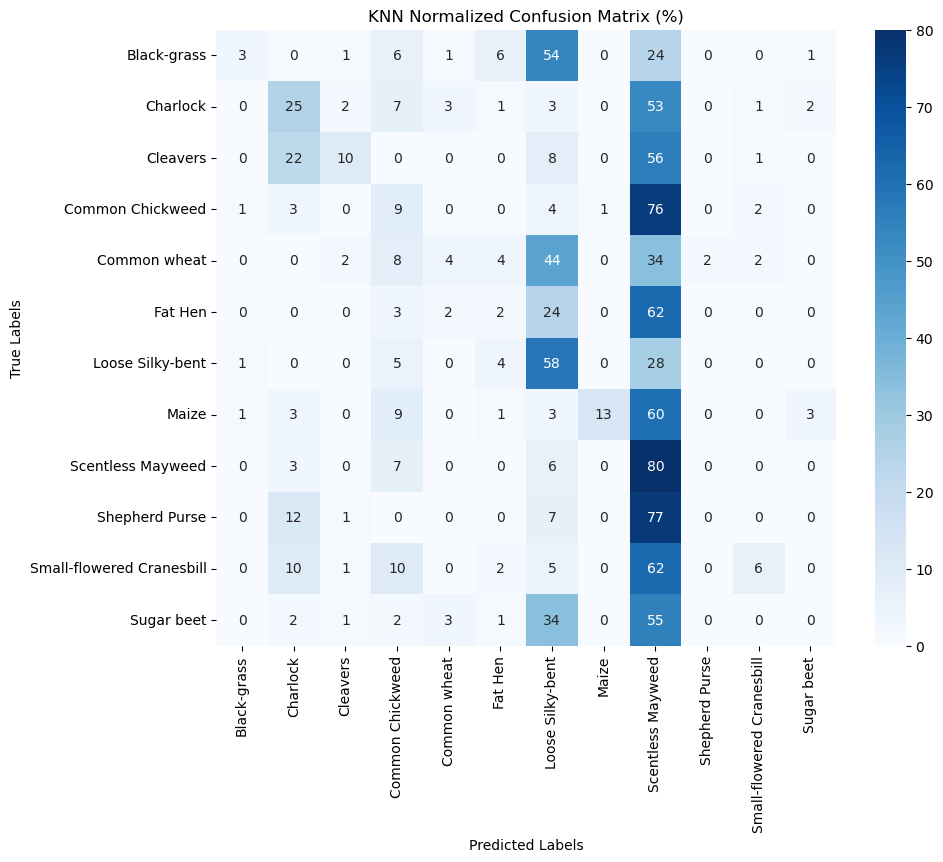


Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.03      0.06        61
           1       0.32      0.26      0.29        90
           2       0.44      0.10      0.17        67
           3       0.20      0.10      0.13       142
           4       0.17      0.04      0.06        50
           5       0.12      0.03      0.05       107
           6       0.37      0.59      0.46       152
           7       0.78      0.14      0.23        51
           8       0.16      0.81      0.26       121
           9       0.00      0.00      0.00        54
          10       0.50      0.07      0.12       115
          11       0.00      0.00      0.00        92

    accuracy                           0.23      1102
   macro avg       0.27      0.18      0.15      1102
weighted avg       0.27      0.23      0.18      1102

Accuracy: 22.96%


['knn_classifier.pkl']

In [27]:
# Create a K-Nearest Neighbors (KNN) classifier
clf_knn = KNeighborsClassifier(n_neighbors=25)  # You can adjust the number of neighbors as needed

# Train the KNN classifier with the training data
clf_knn.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred_knn = clf_knn.predict(X_test_flat)

# Evaluate the performance of the KNN classifier
print("Confusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)

plot_cm_norm(cm_knn, train_generator, "KNN")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Plot the normalized confusion matrix with class names
cm_knn_normalized = (cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis] * 100).astype(int)

# measure accuracy
accuracy = np.mean(y_pred_knn == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Save the trained KNN classifier to a file
joblib.dump(cm_knn, 'knn_classifier.pkl')

Confusion Matrix:


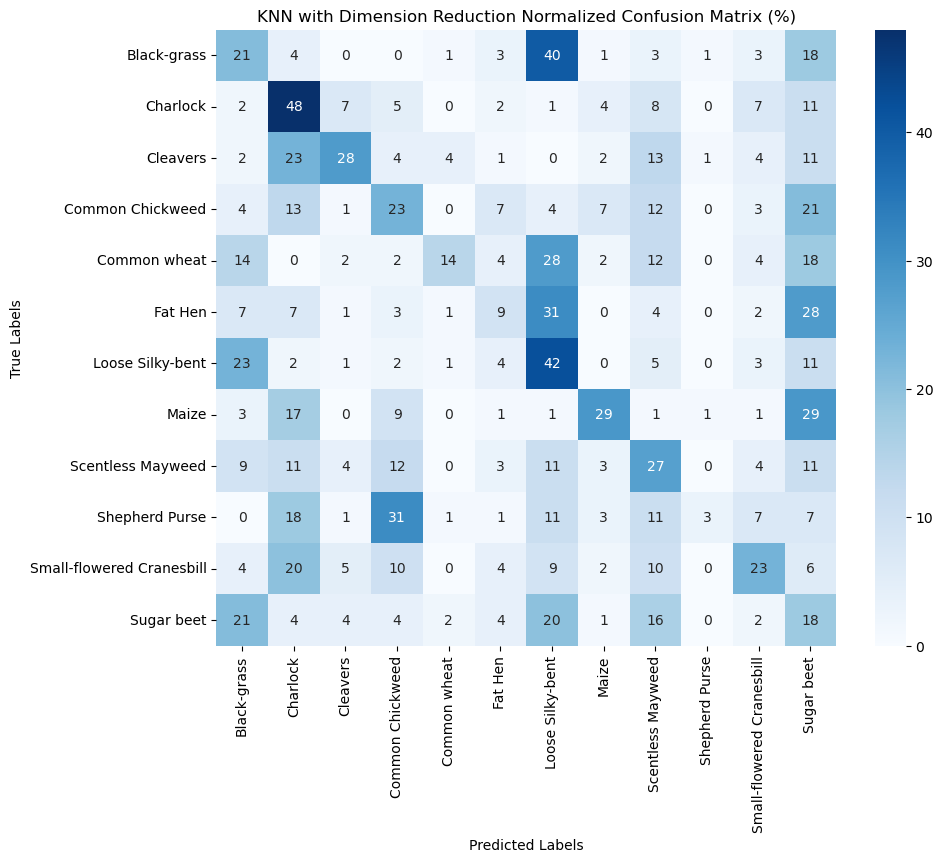


Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.21      0.15        61
           1       0.28      0.49      0.36        90
           2       0.38      0.28      0.32        67
           3       0.32      0.23      0.27       142
           4       0.33      0.14      0.20        50
           5       0.20      0.09      0.13       107
           6       0.33      0.42      0.37       152
           7       0.34      0.29      0.32        51
           8       0.27      0.27      0.27       121
           9       0.29      0.04      0.07        54
          10       0.41      0.23      0.30       115
          11       0.10      0.18      0.13        92

    accuracy                           0.26      1102
   macro avg       0.28      0.24      0.24      1102
weighted avg       0.28      0.26      0.25      1102

Accuracy: 25.77%


['knn_pca_classifier.pkl']

In [28]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)  # Adjust the number of principal components as needed
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Create a K-Nearest Neighbors (KNN) classifier
clf_knn_pca = KNeighborsClassifier(n_neighbors=15)  # You can adjust the number of neighbors as needed

# Train the KNN classifier with the training data after applying PCA
clf_knn_pca.fit(X_train_pca, y_train)

# Make predictions on the test set after applying PCA
y_pred_knn_pca = clf_knn_pca.predict(X_test_pca)

# Evaluate the performance of the KNN classifier after applying PCA
print("Confusion Matrix:")
cm_knn_pca = confusion_matrix(y_test, y_pred_knn_pca)
plot_cm_norm(cm_knn_pca, train_generator, "KNN with Dimension Reduction")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn_pca))

# measure accuracy
accuracy = np.mean(y_pred_knn_pca == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Save the trained KNN classifier to a file
joblib.dump(clf_knn_pca, 'knn_pca_classifier.pkl')

Confusion Matrix:


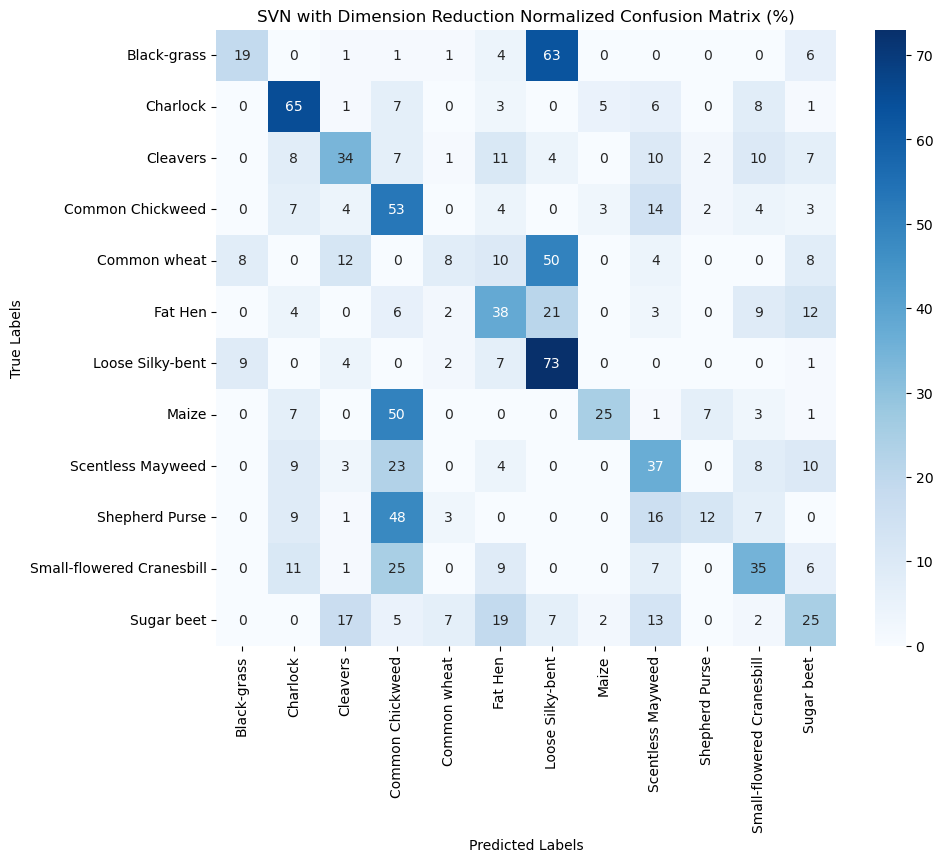


Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.20      0.26        61
           1       0.52      0.66      0.58        90
           2       0.34      0.34      0.34        67
           3       0.36      0.54      0.43       142
           4       0.17      0.08      0.11        50
           5       0.37      0.38      0.37       107
           6       0.53      0.74      0.62       152
           7       0.48      0.25      0.33        51
           8       0.38      0.37      0.38       121
           9       0.41      0.13      0.20        54
          10       0.45      0.36      0.40       115
          11       0.29      0.25      0.27        92

    accuracy                           0.41      1102
   macro avg       0.39      0.36      0.36      1102
weighted avg       0.40      0.41      0.39      1102

Accuracy: 41.38%


['svm_pca_classifier.pkl']

In [30]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)  # Adjust the number of principal components as needed
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Create an SVM classifier with a linear kernel
clf_svn_pca = svm.SVC(kernel='linear', C=1)

# Train the SVM classifier with the training data
clf_svn_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_svn_pca = clf_svn_pca.predict(X_test_pca)

# Evaluate the performance of the SVN classifier after applying PCA
print("Confusion Matrix:")
cm_svn_pca = confusion_matrix(y_test, y_pred_svn_pca)
plot_cm_norm(cm_svn_pca, train_generator, "SVN with Dimension Reduction")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svn_pca))

# measure accuracy
accuracy = np.mean(y_pred_svn_pca == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Save the trained SVM classifier to a file. load like: loaded_svm = joblib.load('svm_classifier.pkl')
joblib.dump(clf_svn_pca, 'svm_pca_classifier.pkl')

In [2]:
# SVM achieves the highest accuracy.
# Test whether data balancing (using data augmentation, refer to Create_balanced_dataset) enhances performance.

data_preprocessing("../archive_balanced"):

Found 7320 images belonging to 12 classes.
Found 1824 images belonging to 12 classes.


Confusion Matrix:


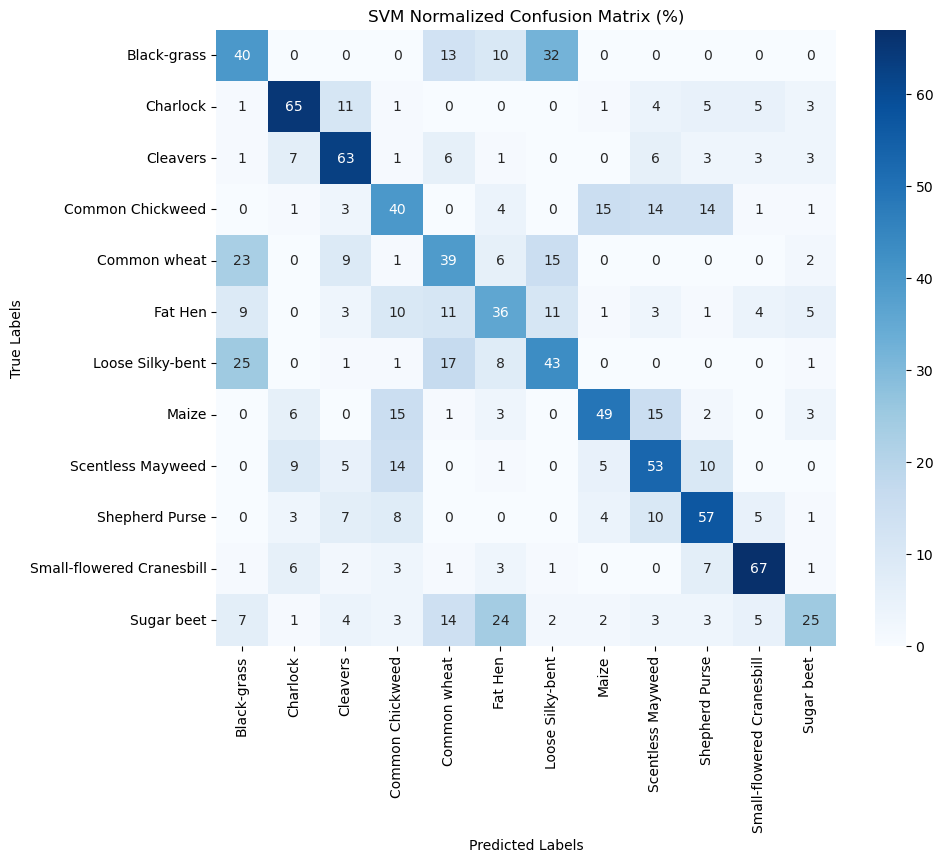


Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.40      0.38       152
           1       0.63      0.65      0.64       152
           2       0.55      0.64      0.59       152
           3       0.40      0.40      0.40       152
           4       0.37      0.39      0.38       152
           5       0.36      0.37      0.36       152
           6       0.40      0.43      0.42       152
           7       0.61      0.49      0.55       152
           8       0.47      0.54      0.50       152
           9       0.54      0.57      0.56       152
          10       0.70      0.68      0.69       152
          11       0.50      0.26      0.34       152

    accuracy                           0.49      1824
   macro avg       0.49      0.49      0.48      1824
weighted avg       0.49      0.49      0.48      1824

Accuracy: 48.57%


['svm_balanced_classifier.pkl']

In [5]:
# With data balancing:
# There is only marginal improvement in terms of accuracy, and while some classifications show improvement in balance,
# others do not.

# Create an SVM classifier with a linear kernel
clf_svm_balanced = svm.SVC(kernel='linear', C=1)

# Train the SVM classifier with the training data
clf_svm_balanced.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred_svm_balanced = clf_svm_balanced.predict(X_test_flat)

# Evaluate the classifier's performance
print("Confusion Matrix:")
cm_svm_balanced = confusion_matrix(y_test, y_pred_svm_balanced)
plot_cm_norm(cm_svm_balanced, train_generator, "SVM")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_balanced))

# measure accuracy
accuracy = np.mean(y_pred_svm_balanced == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Save the trained SVM classifier to a file.
joblib.dump(clf_svm_balanced, 'svm_balanced_classifier.pkl')